# Did they receive a flu vaccine?
by Michael Kearns

# Business Understanding

The company is prepping for the upcoming flu season. The production team wants to determine how many vaccines they need to produce to avoid over spending and reduce waste. To determine this, the plan is to gather information from a sample of individuals and classify how many of them will receive the vaccine. Previous data has been gathered on indiviauls with different behaviors and beliefs and whether they had received the flu vaccine in the past. By building a classification model on the previous data, this model can be used to make future classifications and predictions.

# Data Understanding

After the outbreak of the H1N1 virus, the United states conducted the National 2009 H1N1 Flu Survey. This data collected whether individuals received the H1N1 or seasonal flu vaccine as well as information on their backgrounds and health behaviors. For the purpose of this model, the data will only be used to classify if someone received the seasonal flu vaccine. 

Features of this data are primarily formatted in a binary fasion, where 1 - 'Yes' and 0 - 'No'. Multiple features are object type that will require dummy variables or one hot encoding to be considered in the model.

## Data Preparation

In [1]:
import pandas as pd

In [2]:
#Data source provided two .csv files. 
#The 'training_set_labels.csv' contains the target value, whether a person recevied the seasonal flu vaccine
#The 'training_set_features.csv' contains the multiple features about each respondent.

train_set_features = 'data/training_set_features.csv'
train_set_labels = 'data/training_set_labels.csv'

In [3]:
#Create dataframe from each .csv file.

features = pd.read_csv(train_set_features)
labels = pd.read_csv(train_set_labels)

data = features.merge(labels,how = 'outer', on = 'respondent_id')

In [4]:
#Remove columns related to H1N1
h1n1_cols_delete = ['h1n1_concern','h1n1_knowledge', 
               'doctor_recc_h1n1',
               'opinion_h1n1_vacc_effective', 
               'opinion_h1n1_risk',
               'opinion_h1n1_sick_from_vacc',
                'h1n1_vaccine']
               

data_flu = data.drop(h1n1_cols_delete, axis = 1)

In [5]:
data_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_seasonal         24547 non-null  float64
 9   chronic_med_condition        25736 non-null  float64
 10  child_under_6_months         25887 non-null  float64
 11  health_worker                25903 non-null  float64
 12  health_insurance             14433 non-null  float64
 13  opinion_seas_vac

In [6]:
#Convert:

#convert to binary: 'rent_or_own', 'marital_status',

#dummy variable: 'employment_status', 'household_children','age_group','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc'

# Remove: 'hhs_geo_region', 'census_msa'

#Unsure: 'race', 'sex', 'education',

In [7]:
#Determine which features are missing a lot of data and remove feature from dataset.
data_flu.isna().mean()
data_flu_clean = data_flu.drop(['health_insurance','income_poverty','employment_industry','employment_occupation'],axis = 1)

In [12]:
#Remove rows that is missing data.
data_cleaned = data_flu_clean.dropna(axis = 0)

# Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt

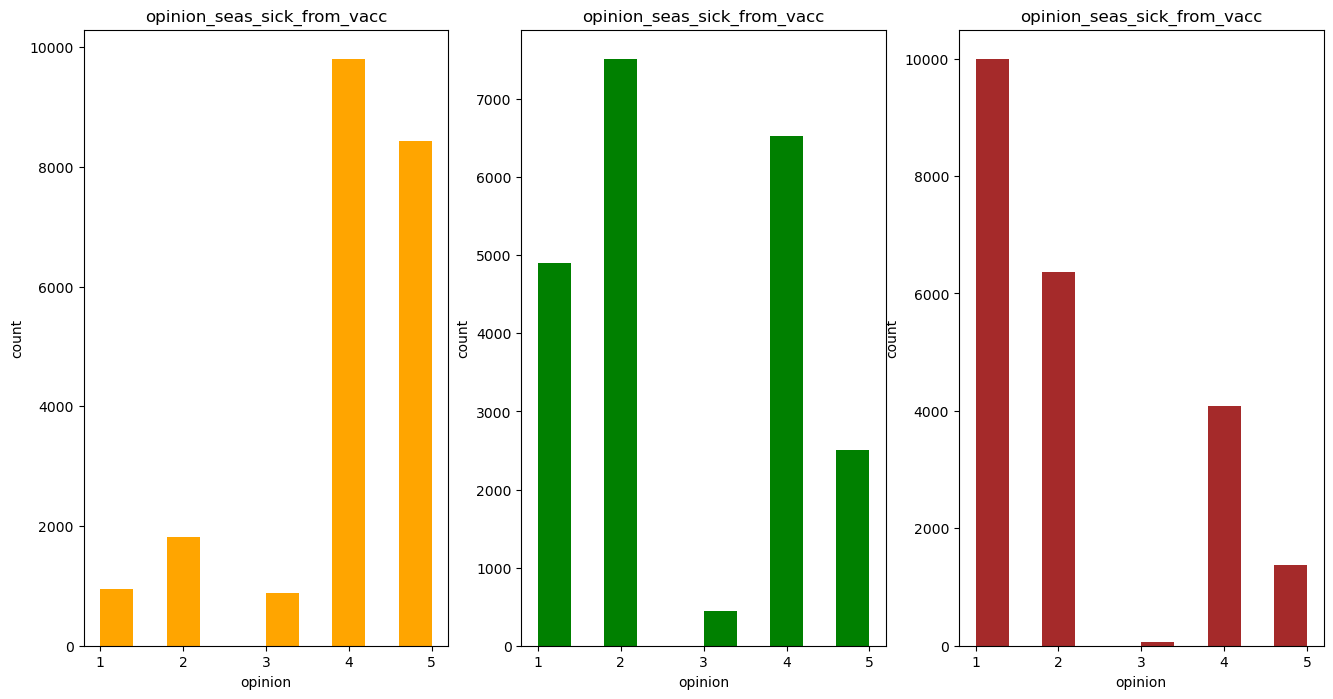

In [32]:
health_opinions = ['opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc']
colors = ['orange','green','brown']
j = len(health_opinions)
fig, axes = plt.subplots(1,j,figsize = (16,8))
for i in range(0,j):
    axes[i].hist(data_cleaned[health_opinions[i]],color = colors[i])
    axes[i].set_title(behavior)
    axes[i].set_ylabel('count')
    axes[i].set_xlabel('opinion')

People's opinions about the seasonal flu vaccine appears to be variable. Therefore this will be a good feature to use in the ML model.

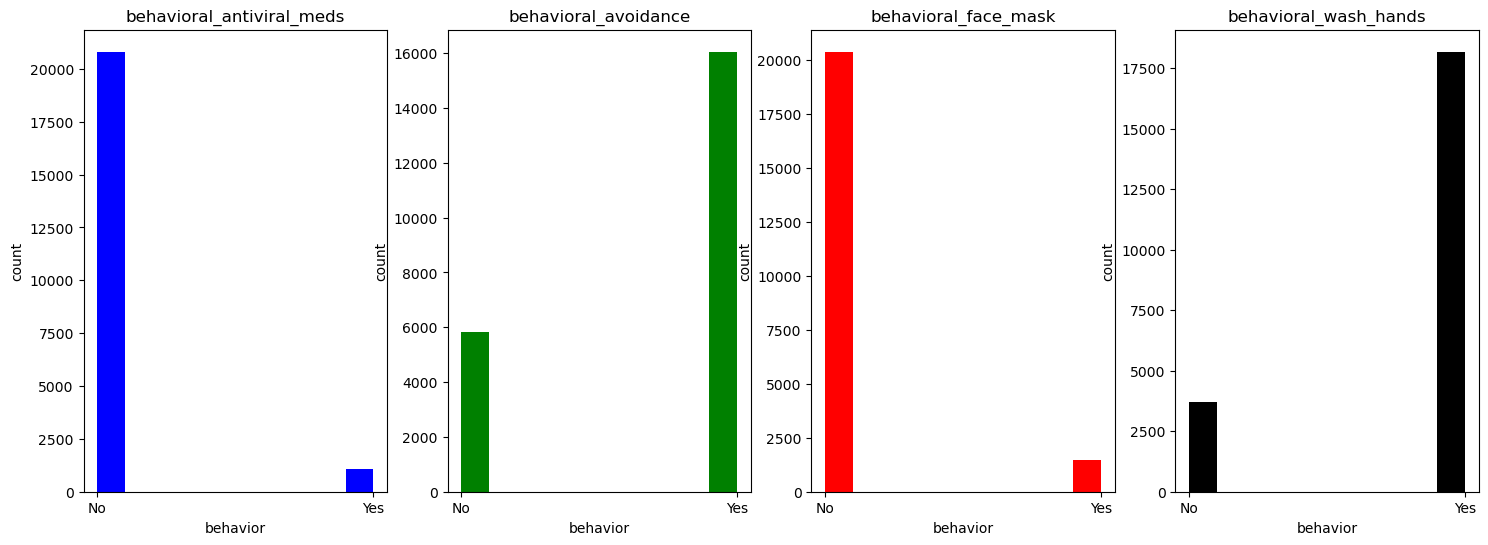

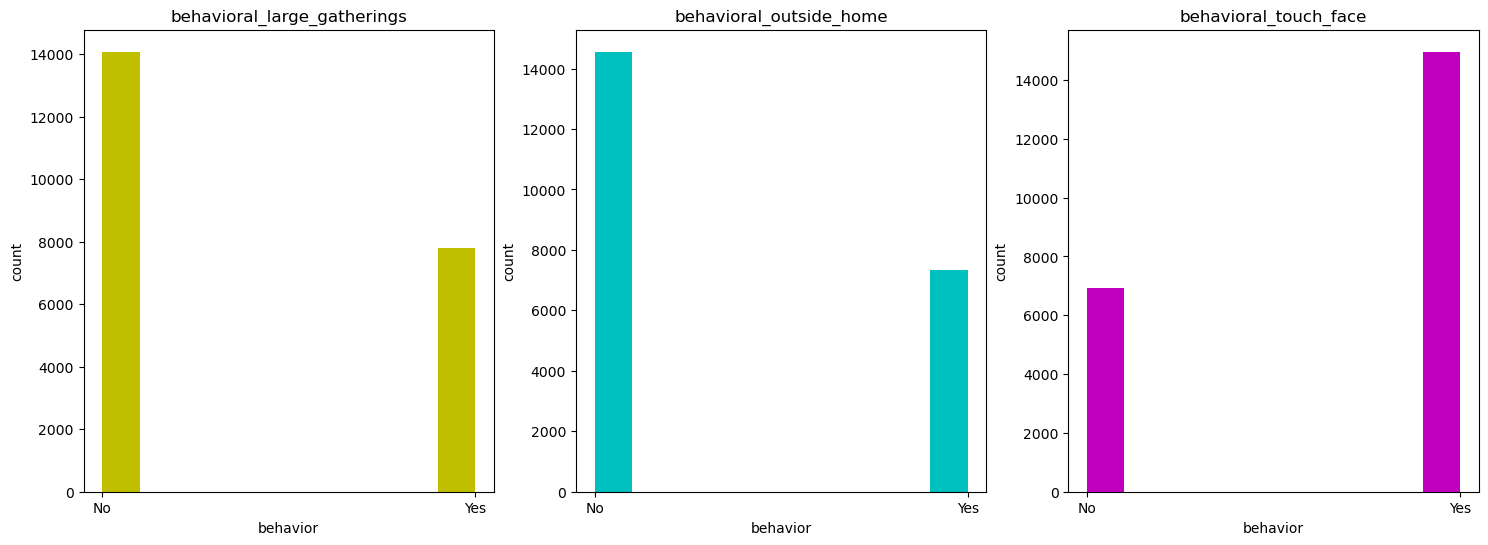

In [43]:
health_behaviors = data_cleaned.columns.tolist()[1:8]
colors = ['b','g','r','k','y','c','m']
fig, axes = plt.subplots(1,4,figsize = (18,6))
for i in range(0,4):
    axes[i].hist(data_cleaned[health_behaviors[i]],color = colors[i])
    axes[i].set_title(health_behaviors[i])
    axes[i].set_ylabel('count')
    axes[i].set_xlabel('behavior')
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['No','Yes'])
fig, axes = plt.subplots(1,3,figsize = (18,6))
for i in range(4,7):
    axes[i-4].hist(data_cleaned[health_behaviors[i]],color = colors[i])
    axes[i-4].set_title(health_behaviors[i])
    axes[i-4].set_ylabel('count')
    axes[i-4].set_xlabel('behavior')
    axes[i-4].set_xticks([0,1])
    axes[i-4].set_xticklabels(['No','Yes'])

People's health behaviors tend to lean more towards one action than the other. This will still be an interesting feature to include.

# ML Modeling

# Conclusions

## Recommendations

## Limitations

## Next Steps